<a href="https://colab.research.google.com/github/cdstreiff/MAT421---Applied-Computational-Methods/blob/main/MAT421SectionHPart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section H HW - MAT 421
## Part 1
### Carson Streiff

### Practicing Euler's method
Here is a simple program demonstrating the effectiveness of Euler's method in solving differential equations. This code iterates through a list that represents the state of the system at regular time intervals, and uses the previous state with the formula for the derivative to generate the value of the state at the next interval.

Here we solve the differential equation dy/dx = xcos(x) + sin(x) using Euler's method and compare it to the analytic solution of y = xsin(x). As we can see the accuracy of the numerical solution increases with a smaller step in the independent variable.

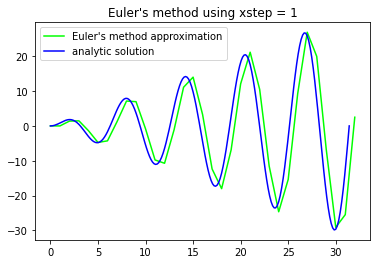

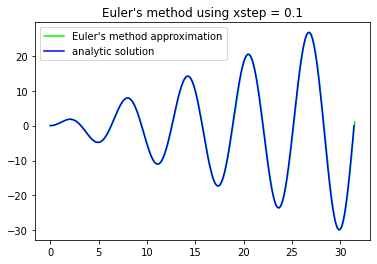

In [73]:
import numpy as np
import matplotlib.pyplot as plt

def exp_euler(df,a,b,h,s0):

    #create array of steps
    t = np.arange(a, b + h, h)
    s = np.zeros(len(t))

    #initial condition
    s[0] = s0

    #loop through S applying Euler's method
    for i in range(0,len(s)-1):
      s[i + 1] = s[i] + h * df(t[i])


    return s


df = lambda x: x * np.cos(x) + np.sin(x)
a = 0
b = 10 * np.pi
h = 1

x = np.arange(a,b+h,h)
y = exp_euler(df,a,b,h,0)

x_real = np.linspace(a,b,200)
y_real = x_real * np.sin(x_real)
plt.plot(x,y,'lime',label = 'Euler\'s method approximation')

plt.plot(x_real,y_real,'b',label = 'analytic solution')
plt.title('Euler\'s method using xstep = 1')
plt.legend()


plt.figure()

h = 0.1
x = np.arange(a,b+h,h)
y = exp_euler(df,a,b,h,0)

x_real = np.linspace(a,b,200)
y_real = x_real * np.sin(x_real)
plt.plot(x,y,'lime',label = 'Euler\'s method approximation')

plt.plot(x_real,y_real,'b',label = 'analytic solution')
plt.title('Euler\'s method using xstep = 0.1')
plt.legend()



## Application: Double Pendulum

The code below simulates the paths of two pendulums attached at their ends.
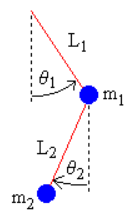

The equations of motion for this system are given as follows:
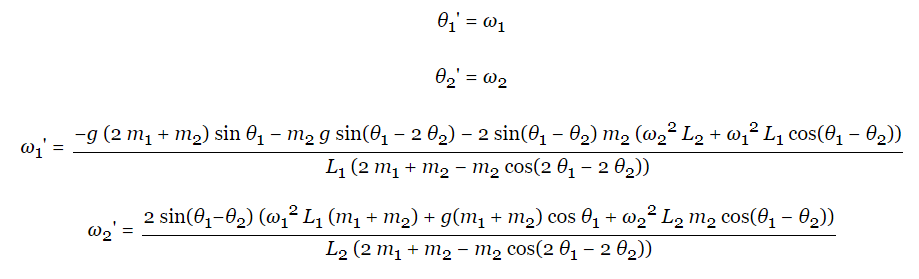

Where lowercase omega is the instantaneous angular velocity for each pendulum. In order to solve this system, we use Euler's method for each angular position and angular velocity. So each loop first evaluates the change in angular velocity at the current conditions, then uses that value to evaluate the new angular positions, then we move onto the next timestep.

This motion is very chaotic, and very incorrect results can occur if our timestep is too large. For example, let's take a look at the system with no initial angular velocity, and a very small amount of initial angular position for theta2. The timestep values are 0.1, 0.01, 0.001, and 0.0001 for the following simulations. Note that the plots become much more accurate to reality as the time resolution is increased.

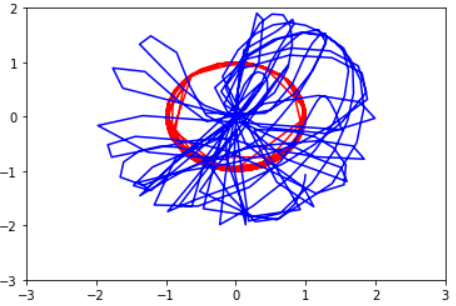

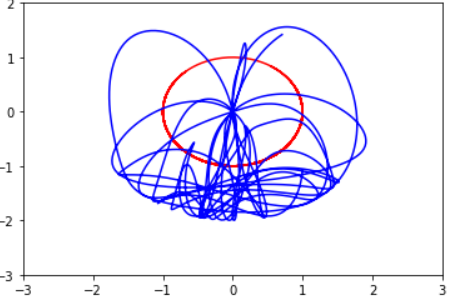

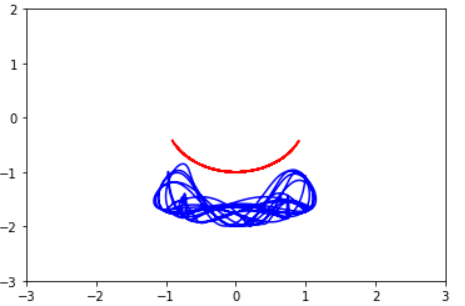

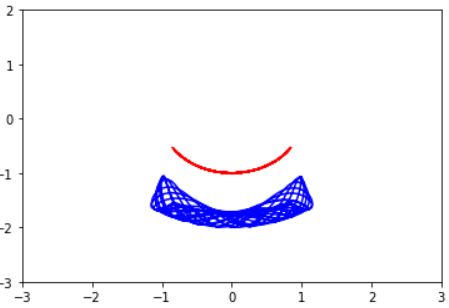

(-3.0, 2.0)

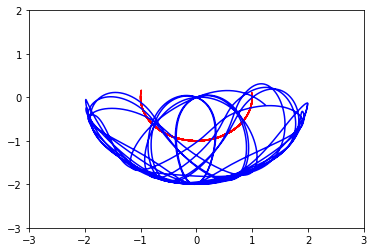

In [74]:
import numpy as np
import matplotlib.pyplot as plt

#constants that can be altered
g = 9.81
L1 = 1
L2 = 1
m1 = 1
m2 = 1

#start time, stop time, timestep
a = 0
b = 25
h = 0.0001

#angle state lists and initial angular conditions
t = np.arange(a,b+h,h)
theta1 = np.zeros(len(t))
theta2 = np.zeros(len(t))
theta1[0] = 1.5
theta2[0] = 1.5

#angular velocity state lists and initial angular velocities
w1 = np.zeros(len(t))
w2 = np.zeros(len(t))
w1[0] = 0
w2[0] = 0


#derivative of w1
dw1 = lambda th1,th2,w1,w2: ( -g * (2*m1 + m2) * np.sin(th1) - m2*g*np.sin(th1 - 2*th2) \
                             - 2* np.sin(th1 - th2) * m2*( (w2**2) * L2 + (w1**2) * L1 * np.cos(th1 - th2)) ) \
                             / (L1 * (2*m1 + m2 - m2*np.cos(2*th1 - 2*th2)))

#derivative of w1
dw2 = lambda th1,th2,w1,w2: ( 2*np.sin(th1 - th2)* ( (w1**2) * L1 * (m1 + m2) + g*(m1 + m2)*np.cos(th1) + (w2**2)*L2*m2*np.cos(th1 - th2))) \
                            / (L2 * (2*m1 + m2 - m2*np.cos(2*th1 - 2*th2)))
        

#loop through
for i in range(0,len(t) - 1):

  #evaluate new angular velocities
  w1[i+1] = w1[i] + h * dw1(theta1[i],theta2[i],w1[i],w2[i])
  w2[i+1] = w2[i] + h * dw2(theta1[i],theta2[i],w1[i],w2[i])

  #use those new valocities as the derivatives of theta
  theta1[i+1] = theta1[i] + h * w1[i]
  theta2[i+1] = theta2[i] + h * w2[i]


#convert to rectangular

x1 = L1 * np.sin(theta1)
y1 = - L1 * np.cos(theta1)

x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

#plot
plt.plot(x1,y1,'r')
plt.plot(x2,y2,'b')

plt.xlim(-3,3)
plt.ylim(-3,2)




